In [1]:
filepath = "/content/drive/MyDrive/sales and fresh veg/archive.zip"

In [2]:
from zipfile import ZipFile

with ZipFile(filepath) as f:
  f.extractall("./fruit")
  print("Data extracted")

Data extracted


In [3]:
import tensorflow as tf
from tensorflow.keras import layers
from PIL import Image
import numpy as np


In [4]:
model=tf.keras.models.load_model("/content/drive/MyDrive/stales and fresh vegetables/fruits.h5")
classes =[
    "fresh_apple",
    "fresh_banana",
    "fresh_bitter_gourd",
    "fresh_capsicum",
    "fresh_orange",
    "fresh_tomato",
    "stale_apple",
    "stale_banana",
    "stale_bitter_gourd",
    "stale_capsicum",
    "stale_orange",
    "stale_tomato"
]
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 18)        1368      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 18)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 18)        2934      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 18)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 36)        5868      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 36)         0

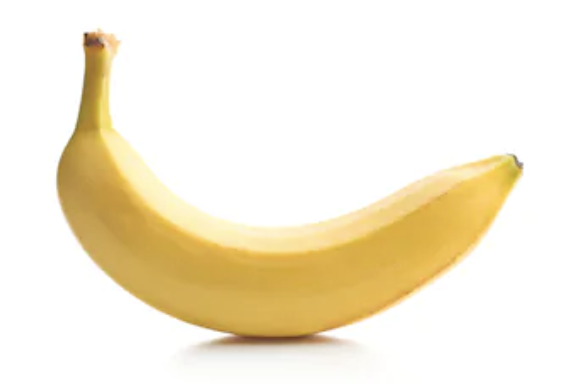

In [5]:
image = Image.open("/content/fruit/fresh_banana/Screen Shot 2018-06-12 at 10.02.36 PM.png")
image
     

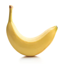

In [6]:
image=image.resize((64,64))
image

In [7]:

def Pred(fruit):
  image = Image.open(fruit)
  image = image.resize((64,64))
  test = tf.reshape(tf.constant(np.array(image)/255),(-1,64,64,3))
  preds = model.predict(test, verbose=False)[0]*100
  preds = tf.math.round(preds)
  confidence = tf.reduce_max(preds)
  index = int(tf.where(preds == confidence)[0][0])
  pred = classes[index]
  return pred.title(),int(confidence),"%"

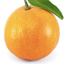

In [8]:
img = Image.open("/content/fruit/fresh_orange/Screen Shot 2018-06-12 at 11.52.40 PM.png")
img = img.resize((64,64))
img

In [9]:
Pred("/content/fruit/fresh_orange/Screen Shot 2018-06-12 at 11.52.40 PM.png")

InvalidArgumentError: ignored